In [148]:
import numpy as np
import os as os
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import sympy as sp
import os as os
#import xlsxwriter

In [8]:
os.chdir("C:/Users/damaso.hernandez/Desktop/Videos/Backup. Damaso hernandez/0.CARPERTA CORDINACION/0.CORDINACION ANALITICA/18. PERSONAL/Python Scripts")

In [132]:
Base_Target='C:/Users/damaso.hernandez/Desktop/Videos/Backup. Damaso hernandez/0.CARPERTA CORDINACION/0.CORDINACION ANALITICA/18. PERSONAL/Python Scripts/data_challenge.csv'
df = pd.read_csv(Base_Target)

In [133]:
df.head() # revisión de primera carga

,cuenta,fec_contab_documento,consumo,categoria_cliente,porcion,dias_fact,descrip_poblac_suministro
0,AATHHM6d7TyIT1ubMnB14A==,2023-04-22,0.0,60,P14,33,BOGOTA
1,AATHHM6d7TyIT1ubMnB14A==,2023-05-23,0.0,60,P14,27,BOGOTA
2,AATHHM6d7TyIT1ubMnB14A==,2023-06-23,0.0,60,P14,33,BOGOTA
3,AATHHM6d7TyIT1ubMnB14A==,2023-07-22,0.0,60,P14,27,BOGOTA
4,AATHHM6d7TyIT1ubMnB14A==,2023-08-23,0.0,60,P14,29,BOGOTA


In [134]:
#creación de función para crear dicotomica de la existencia de consunmos. 
def Crear_dicotomica(variable):
    # si no existe consumo, se considera el 0.0 como cero absoluto y se identifica como no consumo=1, esto para efectos prectivos 
    if variable <=0:
        return 1
    # Si pasa todas las validaciones, el correo es válido
    else:
        return  0

In [135]:
# Se crea la variables dicotomica de no consumo. 
df['DICO_CONSUMO'] = df['consumo'].apply(Crear_dicotomica)

# Se crea variables de unos.  
df['DICO'] = 1

In [136]:
# Crear una nueva columna 'Media_sin_cero' basada en la condición, consumo para tener la distribucion por tipo de cliente 
# sin el efecto de los ceros, esto aria el modelo dependiete de las facturas con consumo. 
df['Media_sin_cero'] = df.apply(lambda row: row['consumo'] / row['dias_fact'] if row['consumo'] > 0 else np.nan, axis=1)

In [137]:
# Agrupar por 'categoria' y calcular la suma de ' No consumo' y 'dias_fact' para cada descrip_poblac_suministro 
agrupado = df.groupby('descrip_poblac_suministro').sum()

# Calcular la proporción para cada categoría
agrupado['proporcion'] = agrupado['DICO_CONSUMO'] / agrupado['DICO']


In [138]:
# Reiniciar el índice del DataFrame agrupado
agrupado = agrupado.reset_index()

# Unir el resultado al DataFrame original por 'descrip_poblac_suministro', asi tenemos la probabilidad de consumo por CIUDAD.
#La Llamamos 
df = pd.merge(df, agrupado[['descrip_poblac_suministro', 'proporcion']], on='descrip_poblac_suministro', how='left')
df.head()

,cuenta,fec_contab_documento,consumo,categoria_cliente,porcion,dias_fact,descrip_poblac_suministro,DICO_CONSUMO,DICO,Media_sin_cero,proporcion
0,AATHHM6d7TyIT1ubMnB14A==,2023-04-22,0.0,60,P14,33,BOGOTA,1,1,NaN,0.089931
1,AATHHM6d7TyIT1ubMnB14A==,2023-05-23,0.0,60,P14,27,BOGOTA,1,1,NaN,0.089931
2,AATHHM6d7TyIT1ubMnB14A==,2023-06-23,0.0,60,P14,33,BOGOTA,1,1,NaN,0.089931
3,AATHHM6d7TyIT1ubMnB14A==,2023-07-22,0.0,60,P14,27,BOGOTA,1,1,NaN,0.089931
4,AATHHM6d7TyIT1ubMnB14A==,2023-08-23,0.0,60,P14,29,BOGOTA,1,1,NaN,0.089931


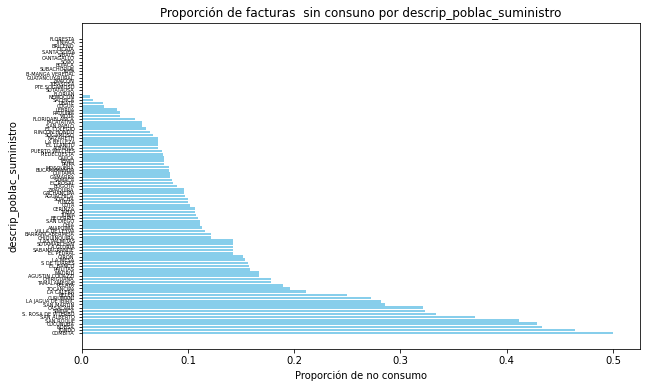

<Figure size 432x288 with 0 Axes>

In [120]:
# Graficar un gráfico de barras horizontal para la probabilidad de consumo  por zona, teniendo zonas con consumo de solo el 50%
# de sus facturaciones, hay cuentas, con cero consumo en todas su facturas, tambien cuentas con consumo en algunas facturas, exitiendo 
#esta combunaciones en las facturas 
plt.figure(figsize=(10, 6))
plt.barh(grouped['descrip_poblac_suministro'], grouped['proporcion'], color='skyblue', height=0.8)
plt.xlabel('Proporción de no consumo')
plt.ylabel('descrip_poblac_suministro')
plt.title('Proporción de facturas  sin consuno por descrip_poblac_suministro')
plt.yticks(fontsize=5)
plt.show()


plt.tight_layout()  # Ajustar el diseño para mejorar la visualización
plt.show()

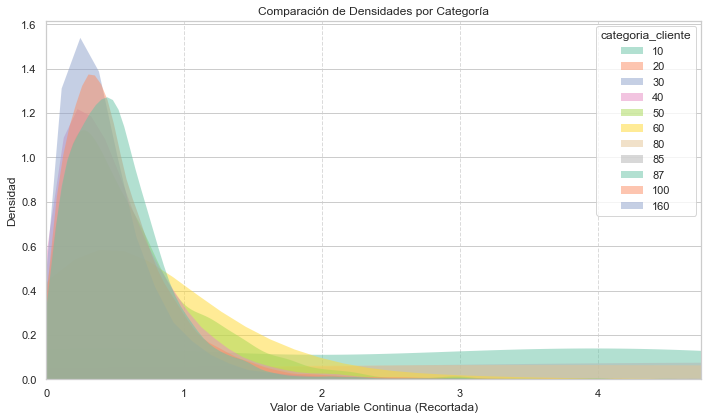

In [165]:
#uso de Seaborn para hacer comparacion de de las distribuciones, por cada CATERGORIA DE CLIENTE, 
#Estas distribuciones 
sns.set(style="whitegrid")

# Crear el gráfico de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Media_sin_cero', hue='categoria_cliente', fill=True, common_norm=False, palette='Set2', alpha=0.5, linewidth=0)
plt.xlim(0, 4.75)  # Establecer el límite en el eje x
plt.xlabel('Media Día de Consumo')
plt.ylabel('Densidad')
plt.title('Comparación de Densidades por Categoría')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

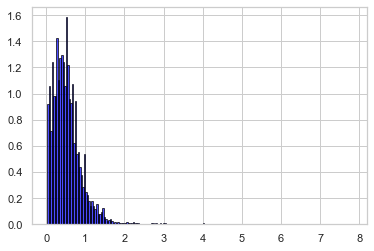

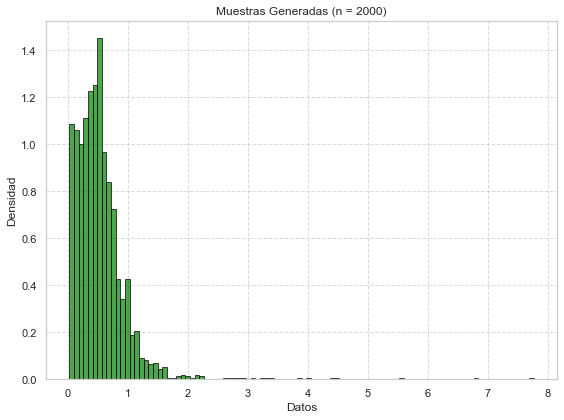

In [336]:
# Crear el histograma de la di
counts10, bins10, _ = plt.hist(df.loc[df['categoria_cliente'] == 10, 'Media_sin_cero'], bins=200, density=True, alpha=0.7, color='blue', edgecolor='black')
# Calcular la CDF empírica a partir del histograma
cdf_10 = np.cumsum(counts10 * np.diff(bins10))
#cdf = np.insert(cdf, 0, 0)  # Insertar 0 al inicio para incluir todo el rango

# Función para generar muestras a partir de la CDF empírica
def generate_samples_10(n_samples):
    u = np.random.rand(n_samples)  # Generar muestras de una distribución uniforme [0, 1)
    indices = np.searchsorted(cdf_10, u, side='right')  # Encontrar índices en la CDF
    samples = bins10[indices]  # Obtener muestras de los bins correspondientes
    return samples

n_samples = 2000
samples = generate_samples_10(n_samples)

# Graficar histograma de las muestras generadas
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=100, density=True, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Datos')
plt.ylabel('Densidad')
plt.title(f'Muestras Generadas (n = {n_samples})')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




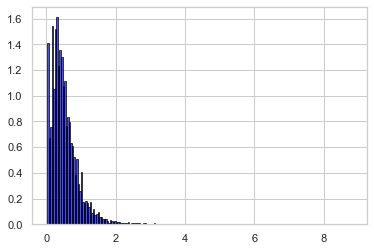

In [234]:
# Crear el histograma
counts20, bins20, _ = plt.hist(df.loc[df['categoria_cliente'] == 20, 'Media_sin_cero'], bins=200, density=True, alpha=0.7, color='blue', edgecolor='black')
# Calcular la CDF empírica a partir del histograma
cdf_20 = np.cumsum(counts20 * np.diff(bins20))
#cdf = np.insert(cdf, 0, 0)  # Insertar 0 al inicio para incluir todo el rango

# Función para generar muestras a partir de la CDF empírica
def generate_samples_20(n_samples):
    u = np.random.rand(n_samples)  # Generar muestras de una distribución uniforme [0, 1)
    indices = np.searchsorted(cdf_20, u, side='right')  # Encontrar índices en la CDF
    samples = bins20[indices]  # Obtener muestras de los bins correspondientes
    return samples

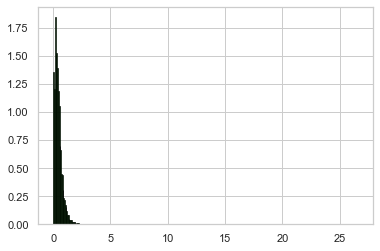

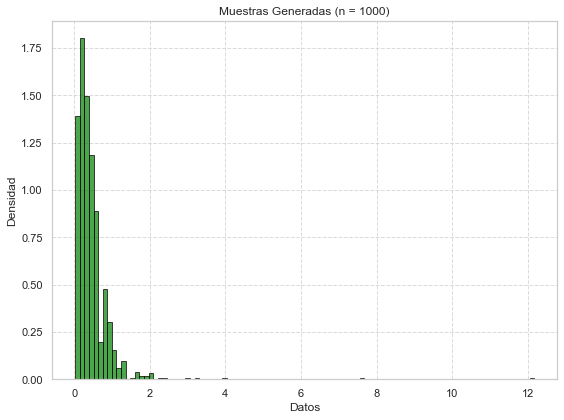

In [262]:
# Crear el histograma
counts30, bins30, _ = plt.hist(df.loc[df['categoria_cliente'] == 30, 'Media_sin_cero'], bins=400, density=True, alpha=0.7, color='green', edgecolor='black')
# Calcular la CDF empírica a partir del histograma
cdf_30 = np.cumsum(counts30 * np.diff(bins30))
#cdf = np.insert(cdf, 0, 0)  # Insertar 0 al inicio para incluir todo el rango

# Función para generar muestras a partir de la CDF empírica
def generate_samples_30(n_samples):
    u = np.random.rand(n_samples)  # Generar muestras de una distribución uniforme [0, 1)
    indices = np.searchsorted(cdf_30, u, side='right')  # Encontrar índices en la CDF
    samples = bins30[indices]  # Obtener muestras de los bins correspondientes
    return samples


n_samples = 1000
samples = generate_samples_30(n_samples)

# Graficar histograma de las muestras generadas
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=100, density=True, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Datos')
plt.ylabel('Densidad')
plt.title(f'Muestras Generadas (n = {n_samples})')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

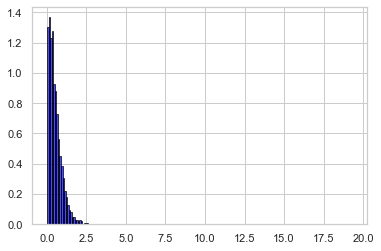

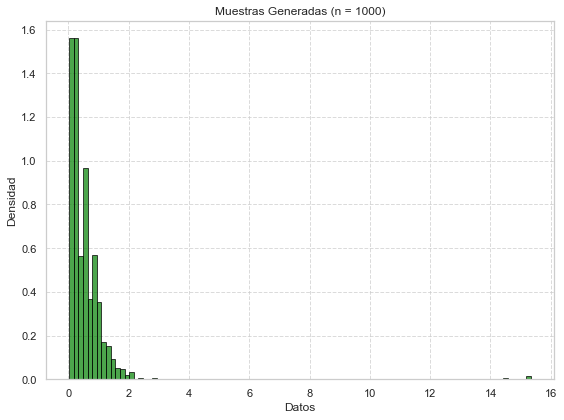

In [255]:
# Crear el histograma
counts40, bins40, _ = plt.hist(df.loc[df['categoria_cliente'] == 40, 'Media_sin_cero'], bins=200, density=True, alpha=0.7, color='blue', edgecolor='black')
# Calcular la CDF empírica a partir del histograma
cdf_40 = np.cumsum(counts40 * np.diff(bins40))
#cdf = np.insert(cdf, 0, 0)  # Insertar 0 al inicio para incluir todo el rango

# Función para generar muestras a partir de la CDF empírica
def generate_samples_40(n_samples):
    u = np.random.rand(n_samples)  # Generar muestras de una distribución uniforme [0, 1)
    indices = np.searchsorted(cdf_40, u, side='right')  # Encontrar índices en la CDF
    samples = bins40[indices]  # Obtener muestras de los bins correspondientes
    return samples


n_samples = 1000
samples = generate_samples_40(n_samples)

# Graficar histograma de las muestras generadas
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=100, density=True, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Datos')
plt.ylabel('Densidad')
plt.title(f'Muestras Generadas (n = {n_samples})')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

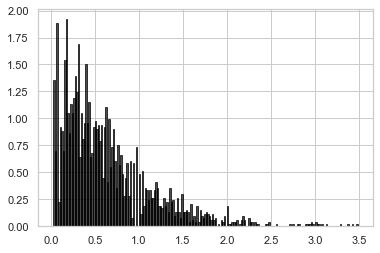

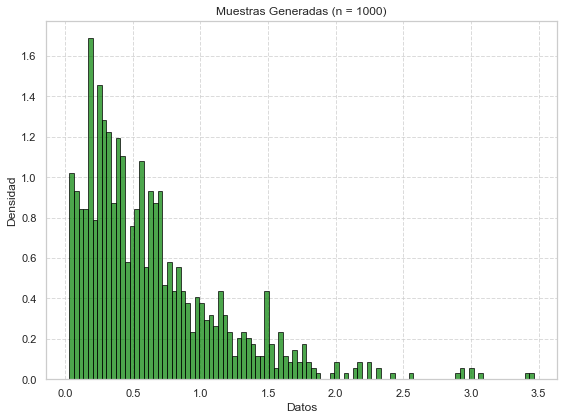

In [419]:
# Crear el histograma
counts50, bins50, _ = plt.hist(df.loc[df['categoria_cliente'] == 50, 'Media_sin_cero'], bins=200, density=True, alpha=0.7, color='black', edgecolor='black')
# Calcular la CDF empírica a partir del histograma
cdf_50 = np.cumsum(counts50 * np.diff(bins50))
#cdf_50 = np.insert(cdf_50, 0, 0)  # Insertar 0 al inicio para incluir todo el rango

# Función para generar muestras a partir de la CDF empírica
def generate_samples_50(n_samples):
    u = np.random.rand(n_samples)  # Generar muestras de una distribución uniforme [0, 1)
    indices = np.searchsorted(cdf_50, u, side='right')  # Encontrar índices en la CDF
    samples = bins50[indices]  # Obtener muestras de los bins correspondientes
    return samples

n_samples = 1000
samples = generate_samples_50(n_samples)

# Graficar histograma de las muestras generadas
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=100, density=True, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Datos')
plt.ylabel('Densidad')
plt.title(f'Muestras Generadas (n = {n_samples})')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

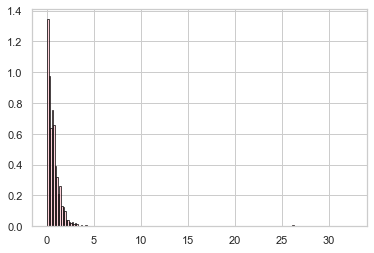

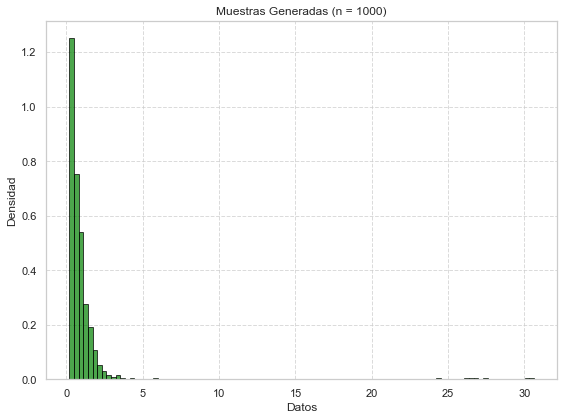

In [420]:
# Crear el histograma
counts60, bins60, _ = plt.hist(df.loc[df['categoria_cliente'] == 60, 'Media_sin_cero'], bins=200, density=True, alpha=0.7, color='pink', edgecolor='black')
# Calcular la CDF empírica a partir del histograma
cdf_60 = np.cumsum(counts60 * np.diff(bins60))
cdf_60 = np.insert(cdf_60, 0, 0)  # Insertar 0 al inicio para incluir todo el rango

# Función para generar muestras a partir de la CDF empírica
def generate_samples_60(n_samples):
    u = np.random.rand(n_samples)  # Generar muestras de una distribución uniforme [0, 1)
    indices = np.searchsorted(cdf_60, u, side='right')  # Encontrar índices en la CDF
    samples = bins60[indices]  # Obtener muestras de los bins correspondientes
    return samples

n_samples = 1000
samples = generate_samples_60(n_samples)

# Graficar histograma de las muestras generadas
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=100, density=True, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Datos')
plt.ylabel('Densidad')
plt.title(f'Muestras Generadas (n = {n_samples})')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

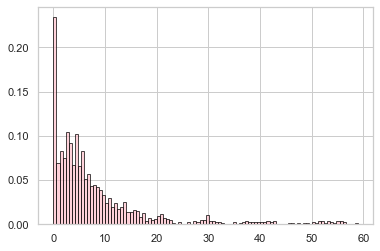

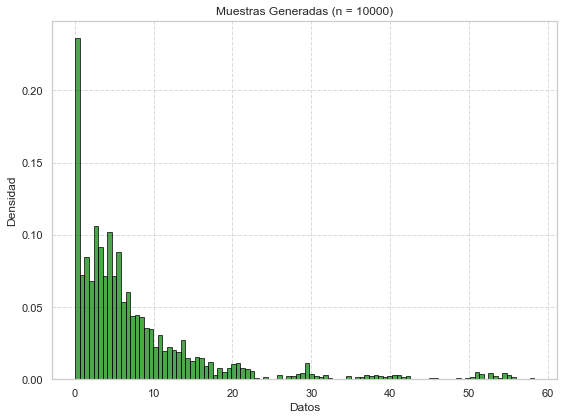

In [493]:
# Crear el histograma
counts80, bins80, _ = plt.hist(df.loc[(df['categoria_cliente'] == 80) & (df['Media_sin_cero'] <= 60) , 'Media_sin_cero'], bins=100, density=True, alpha=0.7, color='pink', edgecolor='black')
# Calcular la CDF empírica a partir del histograma
cdf_80 = np.cumsum(counts80 * np.diff(bins80))
#cdf_80 = np.insert(cdf_80, 0, 0)  # Insertar 0 al inicio para incluir todo el rango

# Función para generar muestras a partir de la CDF empírica
def generate_samples_80(n_samples):
    u = np.random.rand(n_samples)  # Generar muestras de una distribución uniforme [0, 1)
    indices = np.searchsorted(cdf_80, u, side='right')  # Encontrar índices en la CDF
    samples = bins80[indices]  # Obtener muestras de los bins correspondientes
    return samples

n_samples = 10000
samples = generate_samples_80(n_samples)

# Graficar histograma de las muestras generadas
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=100, density=True, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Datos')
plt.ylabel('Densidad')
plt.title(f'Muestras Generadas (n = {n_samples})')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [463]:
# Supongamos que tienes un DataFrame de Pandas llamado Consumos 
# Asegúrate de que Consumo tenga las columnas necesarias para la simulación:
# "probabilidad_Consumo_por_REgion", "Consumo"

In [454]:

def simulacion_consumo(num_simulaciones, creditos):
    valores_consumo = []
    for _ in range(num_simulaciones):
        valor_total_simulado = 0
        for _, credito in creditos.iterrows():  # Iterar sobre las filas del DataFrame
            if random.random() > credito["proporcion"]:
                if credito['categoria_cliente'] == 10:
                    consumo = credito["dias_fact"] * generate_samples_10(1)[0]
                elif credito['categoria_cliente'] == 20:
                    consumo = credito["dias_fact"] * generate_samples_20(1)[0]
                elif credito['categoria_cliente'] == 30:
                    consumo = credito["dias_fact"] * generate_samples_30(1)[0]
                elif credito['categoria_cliente'] == 40:
                    consumo = credito["dias_fact"] * generate_samples_40(1)[0]
                elif credito['categoria_cliente'] == 50:
                    consumo = credito["dias_fact"] * generate_samples_50(1)[0]
                elif credito['categoria_cliente'] == 60:
                    consumo = credito["dias_fact"] * generate_samples_60(1)[0]
                elif credito['categoria_cliente'] == 80:
                    consumo = credito["dias_fact"] * generate_samples_80(1)[0]
            else:
                consumo = 0
            valor_total_simulado += consumo
        valores_consumo.append(valor_total_simulado)
    return valores_consumo


In [439]:
df['fec_contab_documento'] = pd.to_datetime(df['fec_contab_documento'])
#para la simulacion Final, escogemos el mes de mayo 2024, todas las facturaciones.

categorias_deseadas = [10, 20, 30,40,50,60,80]
creditos=df.loc[(df['fec_contab_documento'].dt.month == 5) & (df['fec_contab_documento'].dt.year == 2024) & (df['categoria_cliente'].isin(categorias_deseadas) ) ]
                 
creditos.head()


,cuenta,fec_contab_documento,consumo,categoria_cliente,porcion,dias_fact,descrip_poblac_suministro,DICO_CONSUMO,DICO,Media_sin_cero,proporcion
13,AATHHM6d7TyIT1ubMnB14A==,2024-05-22,0.0,60,NaN,33,BOGOTA,1,1,NaN,0.089931
27,AAXjejreNjAzBOyImQuG1Q==,2024-05-08,12.0,10,NaN,29,BUCARAMANGA,0,1,0.413793,0.082261
41,AApMMuo6Fq8Ox2N3xx8IVg==,2024-05-25,26.0,20,NaN,31,BOGOTA,0,1,0.838710,0.089931
55,ADFh3AofRXlXCDNAMSFpzQ==,2024-05-18,6.0,60,NaN,31,BOGOTA,0,1,0.193548,0.089931
69,ADxBNcbMPdb7/k2M99o59g==,2024-05-11,0.0,20,NaN,30,BOGOTA,1,1,NaN,0.089931


In [497]:
# Parámetros
num_simulaciones = 1000

# Ejecutar simulaciones de Monte Carlo
valores_simulados = simulacion_consumo(num_simulaciones, creditos)


In [498]:
# Calcular estadísticas de los valores simulados
valor_esperado = np.mean(valores_simulados)
var_5 = np.percentile(valores_simulados, 95)
var_95 = np.percentile(valores_simulados, 5)


Valor Esperado del Consumo: 142468.86
Valor en Riesgo al 95% (VaR 95): 135658.14
Valor en Riesgo al 5% (VaR 5): 149390.68


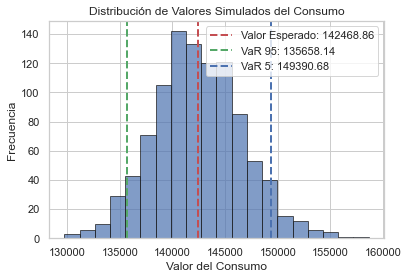

In [499]:

# Mostrar resultados
print(f"Valor Esperado del Consumo: {valor_esperado:.2f}")
print(f"Valor en Riesgo al 95% (VaR 95): {var_95:.2f}")
print(f"Valor en Riesgo al 5% (VaR 5): {var_5:.2f}")

# Histograma de los valores simulados
plt.hist(valores_simulados, bins=20, edgecolor='k', alpha=0.7)
plt.axvline(valor_esperado, color='r', linestyle='dashed', linewidth=2, label=f'Valor Esperado: {valor_esperado:.2f}')
plt.axvline(var_95, color='g', linestyle='dashed', linewidth=2, label=f'VaR 95: {var_95:.2f}')
plt.axvline(var_5, color='b', linestyle='dashed', linewidth=2, label=f'VaR 5: {var_5:.2f}')
plt.title('Distribución de Valores Simulados del Consumo')
plt.xlabel('Valor del Consumo')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()